In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import random
print("Yokoso, watashi no Knapsack Projecto...")

Yokoso, watashi no Knapsack Projecto...


In [3]:
class Item():
    profit = 0
    weight = 0
    def __init__(self, profit, weight):
        self.weight = weight
        self.profit = profit
    def setProfit(self,p):
        self.profit=p
    def setWeight(self,w):
        self.weight = w
    def show_item(self):
        print("Profit: ",self.profit," Weight: ",self.weight)

class Knapsack():
    capacity = 0
    nbItems = 0
    items = []
    def setNbItems(self,nb):
        self.nbItems = nb
    def setCapacity(self,cap):
        self.capacity = cap
    def addItem(self,profit, weight):
        self.items.append(Item(profit,weight)) 
    


In [4]:
# Read the data
def read_data(filename):
    f = open(filename, "r")
    lines = f.readlines()
    knapsack = Knapsack()
    nbItemLine = lines[3].strip().split()
    knapsack.setNbItems(int(nbItemLine[1]))
    capacityLine = lines[4].strip().split()
    knapsack.setCapacity(int(capacityLine[1]))
    data = lines[7:]
    for line in data:
        values = line.strip().split()
        knapsack.addItem(int(values[1]), int(values[2]))
    f.close()
    return knapsack

knapsack_instance = read_data("Data/pi-12-10000-1000-001.kna")
        
for elem in knapsack_instance.items:
        elem.show_item()

print("Nb Items: ", knapsack_instance.nbItems)
print("Capacity: ", knapsack_instance.capacity)

Profit:  582  Weight:  582
Profit:  194  Weight:  194
Profit:  679  Weight:  679
Profit:  485  Weight:  485
Profit:  312  Weight:  396
Profit:  873  Weight:  873
Profit:  468  Weight:  594
Profit:  208  Weight:  264
Profit:  364  Weight:  462
Profit:  260  Weight:  330
Profit:  582  Weight:  582
Profit:  388  Weight:  388
Profit:  291  Weight:  291
Profit:  104  Weight:  132
Profit:  520  Weight:  660
Profit:  416  Weight:  528
Profit:  970  Weight:  970
Profit:  260  Weight:  330
Profit:  582  Weight:  582
Profit:  364  Weight:  462
Profit:  776  Weight:  776
Profit:  194  Weight:  194
Profit:  468  Weight:  594
Profit:  970  Weight:  970
Profit:  312  Weight:  396
Profit:  260  Weight:  330
Profit:  156  Weight:  198
Profit:  485  Weight:  485
Profit:  416  Weight:  528
Profit:  364  Weight:  462
Profit:  582  Weight:  582
Profit:  388  Weight:  388
Profit:  468  Weight:  594
Profit:  679  Weight:  679
Profit:  52  Weight:  66
Profit:  156  Weight:  198
Profit:  312  Weight:  396
Pro

In [ ]:
def EstSolutionValide(solution,SacADos):
    # Fonctions pour checker si une solution est valide ou non
    capacity = SacADos.capacity
    total_capacity = 0
    for i in range(SacADos.nbItems):
        total_capacity+=solution[i]*SacADos.items[i].weight
        if(total_capacity>capacity):
            return False
    return True
def reparer_solution(solution, SacADos):
    # Fonctions pour réparer une solution en enlever aléatoirement des items
    capacity = SacADos.capacity
    total_capacity = sum(solution[i] * SacADos.items[i].weight for i in range(SacADos.nbItems))
    while total_capacity > capacity:
        selected_indices = [i for i, x in enumerate(solution) if x == 1]
        remove_index = random.choice(selected_indices)
        solution[remove_index] = 0
        total_capacity -= SacADos.items[remove_index].weight
    return solution
def calculer_solution(solution,SAD):
    # Fonction pour calculer une solution
    return sum(solution[i] * SAD.items[i].profit for i in range(SAD.nbItems))
def calculer_fitness(solutions,SAD):
    # Fonction pour retourner un tableau de fitness des solutions
    return [calculer_solution(sol,SAD) for sol in solutions]
def select_best_solution(solutions, fitness, n_best=1):
    # Fonction pour séléctioner les meilleurs solutions
    solutions_with_fitness = list(zip(solutions, fitness))
    solutions_with_fitness.sort(key=lambda x: x[1], reverse=True)
    best_solutions = [sol for sol, fit in solutions_with_fitness[:n_best]]
    return best_solutions


In [125]:
def selection_roulette_nfois(solutions,fitness,n):
    # Fonctions pour selections de n nouvelles solutions par tournant n fois la roulette
    total_fitness = sum(fitness)
    selected = []
    for _ in range(n):
        random_fitness = random.uniform(0,total_fitness)
        somme_fitness = 0
        for i,f in enumerate(fitness):
            somme_fitness+=f
            if somme_fitness>= random_fitness:
                selected.append(solutions[i])
                break
    return selected
def selection_roulette_1fois(solutions,fitness,n):
    # Fonctions pour selections de n nouvelles solutions par tournant 1 fois la roulette
    totalfitness = sum(fitness)
    selected = []
    step = totalfitness/n
    start = random.uniform(0, step)
    pointers = [start + i * step for i in range(n)]
    somme_fitness = 0
    index = 0
    for ptr in pointers:
        while somme_fitness < ptr:
            somme_fitness += fitness[index]
            index += 1
        selected.append(solutions[index - 1])
    return selected
def creation_population_initiale(SAD, n):
    Nsol = []
    for _ in range(n):
        sol = np.zeros(SAD.nbItems, dtype=int)  # Initialise une solution avec des 0
        poids_total = 0
        indices = np.random.permutation(SAD.nbItems)  # Mélange les indices des objets
        for idx in indices:
            if poids_total + SAD.items[idx].weight <= SAD.capacity:  # Vérifie si l'objet peut être ajouté
                sol[idx] = 1
                poids_total += SAD.items[idx].weight
        Nsol.append(sol)
    return Nsol
def croisement_simple(solutions):
    enfants = []
    for i in range(0, len(solutions), 2):
        if i + 1 < len(solutions):  # Si paire
            parent1 = solutions[i]
            parent2 = solutions[i + 1]
            milieu = len(parent1) // 2  # Point de croisement au milieu
            enfant1 = np.concatenate((parent1[:milieu], parent2[milieu:]))
            enfant1 = mutation_unique(enfant1)
            enfant2 = np.concatenate((parent2[:milieu], parent1[milieu:]))
            enfant2 = mutation_unique(enfant2)
            enfants.extend([enfant1, enfant2])
            
    return enfants
def croisement_Npoints(solutions, Npoints=2):
    enfants = []
    
    for i in range(0, len(solutions), 2):
        if i + 1 < len(solutions):  # Vérifier qu'il y a bien un pair de parents
            parent1 = solutions[i]
            parent2 = solutions[i + 1]
            longueur = len(parent1)
            
            # Générer Npoints positions de croisement uniformément réparties
            points = np.linspace(0, longueur, Npoints + 2, dtype=int)[1:-1]  # Évite 0 et len(parent1)
            
            enfant1, enfant2 = np.copy(parent1), np.copy(parent2)
            swap = False  # Alternance
            
            # Effectuer le croisement en alternant les segments
            last_idx = 0
            for idx in points:
                if swap:
                    enfant1[last_idx:idx], enfant2[last_idx:idx] = enfant2[last_idx:idx], enfant1[last_idx:idx]
                swap = not swap
                last_idx = idx

            # Appliquer la mutation sur les enfants
            enfant1 = mutation_unique(enfant1)
            enfant2 = mutation_unique(enfant2)
            
            enfants.extend([enfant1, enfant2])
    return enfants

def mutation(solutions):
    if random.randint(1, 100) == 1:  # Probabilité de 1/100
        # Sélectionne une solution au hasard
        index_solution = random.randint(0, len(solutions) - 1)
        solution = solutions[index_solution]
        
        # Sélectionne un élément aléatoire à muter
        index_element = random.randint(0, len(solution) - 1)
        
        # Applique la mutation
        solution[index_element] = 1 - solution[index_element]
        
        # print(f"Mutation appliquée à la solution {index_solution}, élément {index_element}")
    return solutions
def mutation_unique(solution):
    if random.randint(1, 100) == 1:  # Probabilité de 1/100
        index_element = random.randint(0, len(solution) - 1)
        solution[index_element] = 1 - solution[index_element]
    return solution

In [114]:
%%timeit
Nsol = creation_population_initale(SAD, n)

13.1 s ± 414 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [123]:
%%timeit
Nsol = creation_population_initiale(SAD, n)

22.8 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [117]:
len(Nsol)

100

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt

# SAD = read_data("Data/pi-12-10000-1000-001.kna")
# n = (SAD.nbItems // 20) 
# if n%2==0:
#     n+=1
# Nsol = creation_population_initale(SAD, n)
# fitness = calculer_fitness(Nsol, SAD)
# bestKnown = select_best_solution(Nsol, fitness)
# generations = [0]
# best_solutions = []
# tempBestSol = []

# best_G0 = calculer_solution(bestKnown[0], SAD)
# best_solutions.append(best_G0)

# for gen in range(100):
#     fitness = calculer_fitness(Nsol, SAD)
#     bestKnown = select_best_solution(Nsol, fitness)
#     tempBestSol = []
    
#     best_solution = calculer_solution(bestKnown[0], SAD)
#     generations.append(gen + 1)
#     best_solutions.append(best_solution)
    
#     Nsol = selection_roulette_1fois(Nsol, fitness, n)
#     if len(Nsol) % 2 == 1:
#         for i, arr in enumerate(Nsol):
#             if np.array_equal(arr, bestKnown[0]):
#                 del Nsol[i] 
#                 break 
#         tempBestSol = bestKnown[0]
#     Nsol = croisement_simple(Nsol, SAD)
#     Nsol = mutation(Nsol)
    
#     if len(tempBestSol) != 0:
#         Nsol.append(tempBestSol)
    
#     for sol in Nsol:
#         if not EstSolutionValide(sol, SAD):
#             sol = reparer_solution(sol, SAD)
#     fitness = calculer_fitness(Nsol, SAD)

# plt.figure(figsize=(10, 5))
# plt.plot(generations, best_solutions, linestyle='-', color='b', label="Best Solution")
# plt.xlabel("Generation")
# plt.ylabel("Best Solution Value")
# plt.title("Evolution of Best Solution")
# step_size = 100
# plt.xticks(np.arange(0, max(generations) + 1, step_size))
# plt.legend()
# plt.grid()
# plt.show()
# print(max(best_solutions))


In [151]:
%%time
import numpy as np
import matplotlib.pyplot as plt

SAD = read_data("Data/pi-12-10000-1000-001.kna")
n = 100
y = n//5

Nsol = creation_population_initiale(SAD, n)
fitness = calculer_fitness(Nsol, SAD)
bestKnown = select_best_solution(Nsol, fitness,y)

generations = [0]
best_solutions = []
tempBestSols = [] 

best_G0 = calculer_solution(bestKnown[0], SAD)
best_solutions.append(best_G0)

for gen in range(1000):
    Nsol = selection_roulette_1fois(Nsol, fitness, n)

    fitness = calculer_fitness(Nsol, SAD)
    bestKnown = select_best_solution(Nsol, fitness,y)

    tempBestSols = bestKnown[:y] 
    indices_to_remove = []
    indices_to_remove = set()  # Use a set to store unique indices

    for best in tempBestSols:
        for i, sol in enumerate(Nsol):
            if np.array_equal(sol, best) and i not in indices_to_remove:
                indices_to_remove.add(i)
                break  # Stop searching once a match is found

    Nsol = np.delete(Nsol, list(indices_to_remove), axis=0)
    Nsol = croisement_Npoints(Nsol, y)
    
    for i, sol in enumerate(Nsol):
        if not EstSolutionValide(sol, SAD):
            Nsol[i] = reparer_solution(sol, SAD)
    Nsol = np.append(Nsol, tempBestSols, axis=0)
    fitness = calculer_fitness(Nsol, SAD)
    best_solution = max(fitness)
    generations.append(gen + 1)
    best_solutions.append(best_solution)
"""
plt.figure(figsize=(10, 5))
plt.plot(generations, best_solutions, linestyle='-', color='b', label="Best Solution")
plt.xlabel("Generation")
plt.ylabel("Best Solution Value")
plt.title("Evolution of Best Solution")
step_size = 100
plt.xticks(np.arange(0, generations[-1], step_size))
plt.legend()
plt.grid()
plt.show()"""
print(max(best_solutions))


KeyboardInterrupt: 

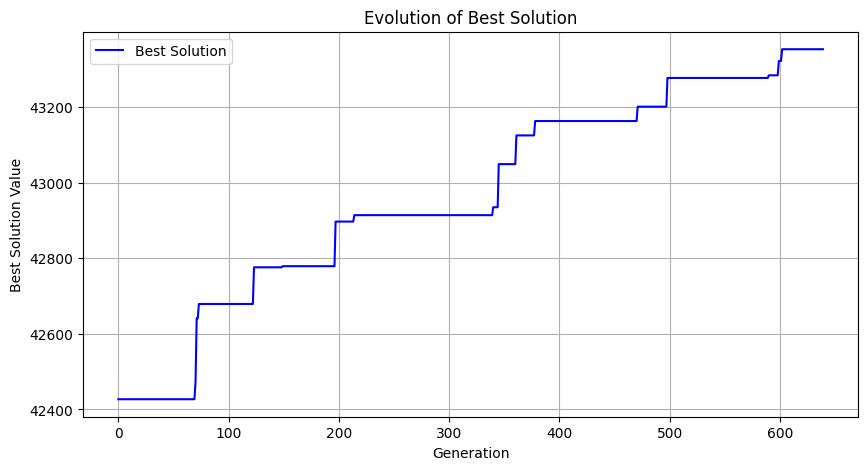

43353


In [153]:
plt.figure(figsize=(10, 5))
plt.plot(generations, best_solutions, linestyle='-', color='b', label="Best Solution")
plt.xlabel("Generation")
plt.ylabel("Best Solution Value")
plt.title("Evolution of Best Solution")
step_size = 100
plt.xticks(np.arange(0, generations[-1], step_size))
plt.legend()
plt.grid()
plt.show()
print(max(best_solutions))

In [55]:
%%time
import numpy as np
import matplotlib.pyplot as plt

SAD = read_data("Data/pi-12-1000-1000-001.kna")
n = 100
y = n//5

Nsol = creation_population_initale(SAD, n)
fitness = calculer_fitness(Nsol, SAD)
bestKnown = select_best_solution(Nsol, fitness,y)

generations = [0]
best_solutions = []
tempBestSols = [] 

best_G0 = calculer_solution(bestKnown[0], SAD)
best_solutions.append(best_G0)
print(len(Nsol))


100
CPU times: total: 62.5 ms
Wall time: 60.7 ms


In [78]:
%time
for gen in range(1000):
    Nsol = selection_roulette_nfois(Nsol, fitness, n)

    fitness = calculer_fitness(Nsol, SAD)
    bestKnown = select_best_solution(Nsol, fitness,y)
    tempBestSols = bestKnown[:y] 
    indices_to_remove = []
    indices_to_remove = set()  # Use a set to store unique indices

    for best in tempBestSols:
        for i, sol in enumerate(Nsol):
            if np.array_equal(sol, best) and i not in indices_to_remove:
                indices_to_remove.add(i)
                break  # Stop searching once a match is found
    Nsol = np.delete(Nsol, list(indices_to_remove), axis=0)
    Nsol = croisement_Npoints(Nsol, y)
    Nsol = np.append(Nsol, tempBestSols, axis=0)

CPU times: total: 0 ns
Wall time: 4.29 μs


In [51]:
%time
for gen in range(1000):
    print(len(Nsol))
    Nsol = croisement_Npoints(Nsol, n//5)
    


CPU times: total: 0 ns
Wall time: 2.62 μs
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
10

In [ ]:
%time
for gen in range(1000):
    for i, sol in enumerate(Nsol):
        if not EstSolutionValide(sol, SAD):
            Nsol[i] = reparer_solution(sol, SAD)
    fitness = calculer_fitness(Nsol, SAD)
    best_solution = max(fitness)
    generations.append(gen + 1)
    best_solutions.append(best_solution)
"""
plt.figure(figsize=(10, 5))
plt.plot(generations, best_solutions, linestyle='-', color='b', label="Best Solution")
plt.xlabel("Generation")
plt.ylabel("Best Solution Value")
plt.title("Evolution of Best Solution")
step_size = 100
plt.xticks(np.arange(0, generations[-1], step_size))
plt.legend()
plt.grid()
plt.show()"""
print(max(best_solutions))
